# Quantum Entanglement and Bell States

## Introduction

Quantum entanglement is one of the most profound features of quantum mechanics, famously described by Einstein as "spooky action at a distance." When two particles become entangled, their quantum states become correlated in such a way that the measurement of one particle instantaneously determines the state of the other, regardless of the distance separating them.

## Theoretical Background

### Single Qubit States

A single qubit can exist in a superposition of the computational basis states $|0\rangle$ and $|1\rangle$:

$$|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$$

where $\alpha, \beta \in \mathbb{C}$ and $|\alpha|^2 + |\beta|^2 = 1$ (normalization condition).

The computational basis states are represented as:

$$|0\rangle = \begin{pmatrix} 1 \\ 0 \end{pmatrix}, \quad |1\rangle = \begin{pmatrix} 0 \\ 1 \end{pmatrix}$$

### Two-Qubit Systems

For a system of two qubits, the state space is the tensor product of individual state spaces. The computational basis for two qubits consists of:

$$|00\rangle, |01\rangle, |10\rangle, |11\rangle$$

where $|ij\rangle = |i\rangle \otimes |j\rangle$ represents the first qubit in state $|i\rangle$ and the second in state $|j\rangle$.

### The Bell States

The **Bell states** (also known as EPR pairs) form a maximally entangled basis for the two-qubit system. They are defined as:

$$|\Phi^+\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$$

$$|\Phi^-\rangle = \frac{1}{\sqrt{2}}(|00\rangle - |11\rangle)$$

$$|\Psi^+\rangle = \frac{1}{\sqrt{2}}(|01\rangle + |10\rangle)$$

$$|\Psi^-\rangle = \frac{1}{\sqrt{2}}(|01\rangle - |10\rangle)$$

These states exhibit **maximal entanglement**: measuring one qubit immediately determines the state of the other.

### Quantum Gates for Bell State Preparation

Bell states can be created using the **Hadamard gate** and **CNOT gate**:

$$H = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}$$

$$\text{CNOT} = \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{pmatrix}$$

The circuit for creating $|\Phi^+\rangle$ from $|00\rangle$ is:

$$|00\rangle \xrightarrow{H \otimes I} \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)|0\rangle \xrightarrow{\text{CNOT}} \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle) = |\Phi^+\rangle$$

### Bell's Inequality and CHSH Inequality

The **CHSH inequality** provides a way to test whether correlations can be explained by local hidden variable theories:

$$|S| = |E(a,b) - E(a,b') + E(a',b) + E(a',b')| \leq 2$$

For classical (local realistic) theories, $|S| \leq 2$. However, quantum mechanics predicts:

$$|S|_{\text{max}} = 2\sqrt{2} \approx 2.828$$

This **quantum violation** of Bell's inequality has been experimentally verified numerous times.

## Implementation

We will now implement:
1. Construction and visualization of Bell states
2. Simulation of Bell state measurements
3. Demonstration of CHSH inequality violation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import kron

# Set random seed for reproducibility
np.random.seed(42)

# Define computational basis states
ket_0 = np.array([[1], [0]], dtype=complex)
ket_1 = np.array([[0], [1]], dtype=complex)

# Two-qubit computational basis
ket_00 = kron(ket_0, ket_0)
ket_01 = kron(ket_0, ket_1)
ket_10 = kron(ket_1, ket_0)
ket_11 = kron(ket_1, ket_1)

print("Two-qubit computational basis states:")
print(f"|00⟩ = {ket_00.flatten()}")
print(f"|01⟩ = {ket_01.flatten()}")
print(f"|10⟩ = {ket_10.flatten()}")
print(f"|11⟩ = {ket_11.flatten()}")

Two-qubit computational basis states:
|00⟩ = [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
|01⟩ = [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
|10⟩ = [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
|11⟩ = [0.+0.j 0.+0.j 0.+0.j 1.+0.j]


/tmp/ipykernel_159938/747218882.py:13: DeprecationWarning: `kron` has been deprecated in favour of `numpy.kron` in SciPy 1.15.0 and will be removed in SciPy 1.17.0.
  ket_00 = kron(ket_0, ket_0)
/tmp/ipykernel_159938/747218882.py:14: DeprecationWarning: `kron` has been deprecated in favour of `numpy.kron` in SciPy 1.15.0 and will be removed in SciPy 1.17.0.
  ket_01 = kron(ket_0, ket_1)
/tmp/ipykernel_159938/747218882.py:15: DeprecationWarning: `kron` has been deprecated in favour of `numpy.kron` in SciPy 1.15.0 and will be removed in SciPy 1.17.0.
  ket_10 = kron(ket_1, ket_0)
/tmp/ipykernel_159938/747218882.py:16: DeprecationWarning: `kron` has been deprecated in favour of `numpy.kron` in SciPy 1.15.0 and will be removed in SciPy 1.17.0.
  ket_11 = kron(ket_1, ket_1)


In [2]:
# Define quantum gates
# Hadamard gate
H = (1/np.sqrt(2)) * np.array([[1, 1], [1, -1]], dtype=complex)

# Pauli matrices
I = np.array([[1, 0], [0, 1]], dtype=complex)
X = np.array([[0, 1], [1, 0]], dtype=complex)
Y = np.array([[0, -1j], [1j, 0]], dtype=complex)
Z = np.array([[1, 0], [0, -1]], dtype=complex)

# CNOT gate (control on first qubit, target on second)
CNOT = np.array([[1, 0, 0, 0],
                 [0, 1, 0, 0],
                 [0, 0, 0, 1],
                 [0, 0, 1, 0]], dtype=complex)

print("Hadamard gate H:")
print(np.round(H, 3))
print("\nCNOT gate:")
print(CNOT.astype(int))

Hadamard gate H:
[[ 0.707+0.j  0.707+0.j]
 [ 0.707+0.j -0.707+0.j]]

CNOT gate:
[[1 0 0 0]
 [0 1 0 0]
 [0 0 0 1]
 [0 0 1 0]]


/tmp/ipykernel_159938/1762473659.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
  print(CNOT.astype(int))


In [3]:
def create_bell_states():
    """
    Create all four Bell states using quantum gates.
    
    Returns:
        dict: Dictionary containing all four Bell states
    """
    # |Φ+⟩ = (|00⟩ + |11⟩)/√2
    # Created from |00⟩ by applying H⊗I then CNOT
    H_I = kron(H, I)  # Hadamard on first qubit, identity on second
    phi_plus = CNOT @ H_I @ ket_00
    
    # |Φ-⟩ = (|00⟩ - |11⟩)/√2
    # Created from |10⟩ by applying H⊗I then CNOT
    phi_minus = CNOT @ H_I @ ket_10
    
    # |Ψ+⟩ = (|01⟩ + |10⟩)/√2
    # Created from |01⟩ by applying H⊗I then CNOT
    psi_plus = CNOT @ H_I @ ket_01
    
    # |Ψ-⟩ = (|01⟩ - |10⟩)/√2
    # Created from |11⟩ by applying H⊗I then CNOT
    psi_minus = CNOT @ H_I @ ket_11
    
    return {
        'Φ+': phi_plus,
        'Φ-': phi_minus,
        'Ψ+': psi_plus,
        'Ψ-': psi_minus
    }

bell_states = create_bell_states()

print("Bell States:")
print("="*50)
for name, state in bell_states.items():
    print(f"\n|{name}⟩ = {np.round(state.flatten(), 4)}")
    # Verify normalization
    norm = np.vdot(state, state)
    print(f"  Norm: {np.abs(norm):.4f}")

Bell States:

|Φ+⟩ = [0.7071+0.j 0.    +0.j 0.    +0.j 0.7071+0.j]
  Norm: 1.0000

|Φ-⟩ = [ 0.7071+0.j  0.    +0.j  0.    +0.j -0.7071+0.j]
  Norm: 1.0000

|Ψ+⟩ = [0.    +0.j 0.7071+0.j 0.7071+0.j 0.    +0.j]
  Norm: 1.0000

|Ψ-⟩ = [ 0.    +0.j  0.7071+0.j -0.7071+0.j  0.    +0.j]
  Norm: 1.0000


/tmp/ipykernel_159938/1247714378.py:10: DeprecationWarning: `kron` has been deprecated in favour of `numpy.kron` in SciPy 1.15.0 and will be removed in SciPy 1.17.0.
  H_I = kron(H, I)  # Hadamard on first qubit, identity on second


In [4]:
def measure_two_qubit_state(state, n_measurements=1000):
    """
    Simulate measurements on a two-qubit state.
    
    Args:
        state: 4x1 state vector
        n_measurements: Number of measurement trials
    
    Returns:
        dict: Counts of each measurement outcome
    """
    # Calculate probabilities for each basis state
    probabilities = np.abs(state.flatten())**2
    
    # Possible outcomes: 00, 01, 10, 11
    outcomes = ['00', '01', '10', '11']
    
    # Simulate measurements
    results = np.random.choice(outcomes, size=n_measurements, p=probabilities)
    
    # Count outcomes
    counts = {outcome: np.sum(results == outcome) for outcome in outcomes}
    
    return counts

# Simulate measurements on each Bell state
n_shots = 10000

print(f"Measurement simulation ({n_shots} shots each):")
print("="*60)

measurement_results = {}
for name, state in bell_states.items():
    counts = measure_two_qubit_state(state, n_shots)
    measurement_results[name] = counts
    print(f"\n|{name}⟩:")
    for outcome, count in counts.items():
        print(f"  |{outcome}⟩: {count} ({100*count/n_shots:.1f}%)")

Measurement simulation (10000 shots each):

|Φ+⟩:
  |00⟩: 5076 (50.8%)
  |01⟩: 0 (0.0%)
  |10⟩: 0 (0.0%)
  |11⟩: 4924 (49.2%)

|Φ-⟩:
  |00⟩: 4936 (49.4%)
  |01⟩: 0 (0.0%)
  |10⟩: 0 (0.0%)
  |11⟩: 5064 (50.6%)

|Ψ+⟩:
  |00⟩: 0 (0.0%)
  |01⟩: 4978 (49.8%)
  |10⟩: 5022 (50.2%)
  |11⟩: 0 (0.0%)

|Ψ-⟩:
  |00⟩: 0 (0.0%)
  |01⟩: 5000 (50.0%)
  |10⟩: 5000 (50.0%)
  |11⟩: 0 (0.0%)


In [5]:
def rotation_matrix(theta):
    """
    Create a rotation matrix for measurement in a rotated basis.
    This corresponds to measuring spin along an axis at angle θ from z-axis.
    """
    return np.array([[np.cos(theta/2), -np.sin(theta/2)],
                     [np.sin(theta/2), np.cos(theta/2)]], dtype=complex)

def expectation_value(state, observable):
    """
    Calculate expectation value ⟨ψ|O|ψ⟩.
    """
    return np.real(np.vdot(state, observable @ state))

def correlation_E(state, theta_a, theta_b):
    """
    Calculate the correlation function E(a,b) for measurements
    at angles θ_a and θ_b for qubits A and B respectively.
    
    E(a,b) = ⟨ψ|(σ_a ⊗ σ_b)|ψ⟩
    
    where σ_a and σ_b are spin measurements along directions a and b.
    """
    # Measurement operator along angle θ is: cos(θ)Z + sin(θ)X
    sigma_a = np.cos(theta_a) * Z + np.sin(theta_a) * X
    sigma_b = np.cos(theta_b) * Z + np.sin(theta_b) * X
    
    # Joint measurement operator
    joint_op = kron(sigma_a, sigma_b)
    
    return expectation_value(state, joint_op)

def chsh_parameter(state, a, a_prime, b, b_prime):
    """
    Calculate the CHSH parameter S for given measurement angles.
    
    S = E(a,b) - E(a,b') + E(a',b) + E(a',b')
    """
    S = (correlation_E(state, a, b) 
         - correlation_E(state, a, b_prime) 
         + correlation_E(state, a_prime, b) 
         + correlation_E(state, a_prime, b_prime))
    return S

# Test with |Φ+⟩ state
phi_plus = bell_states['Φ+']

# Optimal angles for maximal CHSH violation
# a = 0, a' = π/2, b = π/4, b' = 3π/4
a = 0
a_prime = np.pi/2
b = np.pi/4
b_prime = 3*np.pi/4

S = chsh_parameter(phi_plus, a, a_prime, b, b_prime)

print("CHSH Inequality Test")
print("="*50)
print(f"\nOptimal measurement angles:")
print(f"  a = {np.degrees(a):.1f}°")
print(f"  a' = {np.degrees(a_prime):.1f}°")
print(f"  b = {np.degrees(b):.1f}°")
print(f"  b' = {np.degrees(b_prime):.1f}°")
print(f"\nCHSH parameter S = {S:.4f}")
print(f"Classical bound: |S| ≤ 2")
print(f"Quantum bound (Tsirelson): |S| ≤ 2√2 ≈ {2*np.sqrt(2):.4f}")
print(f"\nViolation: {'YES ✓' if np.abs(S) > 2 else 'NO'}")

CHSH Inequality Test

Optimal measurement angles:
  a = 0.0°
  a' = 90.0°
  b = 45.0°
  b' = 135.0°

CHSH parameter S = 2.8284
Classical bound: |S| ≤ 2
Quantum bound (Tsirelson): |S| ≤ 2√2 ≈ 2.8284

Violation: YES ✓


/tmp/ipykernel_159938/1694532951.py:29: DeprecationWarning: `kron` has been deprecated in favour of `numpy.kron` in SciPy 1.15.0 and will be removed in SciPy 1.17.0.
  joint_op = kron(sigma_a, sigma_b)


In [6]:
def simulate_chsh_experiment(state, n_shots=10000):
    """
    Simulate a CHSH experiment with finite measurements.
    
    Returns:
        float: Estimated S parameter from simulated measurements
    """
    # Measurement angles
    a = 0
    a_prime = np.pi/2
    b = np.pi/4
    b_prime = 3*np.pi/4
    
    settings = [(a, b), (a, b_prime), (a_prime, b), (a_prime, b_prime)]
    
    correlations = []
    
    for theta_a, theta_b in settings:
        # Measurement operators
        sigma_a = np.cos(theta_a) * Z + np.sin(theta_a) * X
        sigma_b = np.cos(theta_b) * Z + np.sin(theta_b) * X
        
        # Eigenvalues and eigenvectors for each measurement
        eig_a, vec_a = np.linalg.eigh(sigma_a)
        eig_b, vec_b = np.linalg.eigh(sigma_b)
        
        # Joint measurement basis
        joint_basis = []
        joint_eigenvalues = []
        for i in range(2):
            for j in range(2):
                joint_basis.append(kron(vec_a[:, i:i+1], vec_b[:, j:j+1]))
                joint_eigenvalues.append(eig_a[i] * eig_b[j])
        
        # Calculate probabilities
        probs = [np.abs(np.vdot(basis, state))**2 for basis in joint_basis]
        probs = np.array(probs) / np.sum(probs)  # Normalize
        
        # Simulate measurements
        outcomes = np.random.choice(len(probs), size=n_shots, p=probs)
        measured_values = [joint_eigenvalues[o] for o in outcomes]
        
        # Estimate correlation
        correlations.append(np.mean(measured_values))
    
    # Calculate S
    S = correlations[0] - correlations[1] + correlations[2] + correlations[3]
    
    return S, correlations

# Run multiple experiments to estimate variance
n_experiments = 100
n_shots_per_exp = 1000

S_values = []
for _ in range(n_experiments):
    S_exp, _ = simulate_chsh_experiment(phi_plus, n_shots_per_exp)
    S_values.append(S_exp)

S_mean = np.mean(S_values)
S_std = np.std(S_values)

print("Simulated CHSH Experiment")
print("="*50)
print(f"Number of experiments: {n_experiments}")
print(f"Shots per experiment: {n_shots_per_exp}")
print(f"\nMean S = {S_mean:.4f} ± {S_std:.4f}")
print(f"Theoretical S = {2*np.sqrt(2):.4f}")

Simulated CHSH Experiment
Number of experiments: 100
Shots per experiment: 1000

Mean S = 2.8253 ± 0.0473
Theoretical S = 2.8284


/tmp/ipykernel_159938/734401913.py:32: DeprecationWarning: `kron` has been deprecated in favour of `numpy.kron` in SciPy 1.15.0 and will be removed in SciPy 1.17.0.
  joint_basis.append(kron(vec_a[:, i:i+1], vec_b[:, j:j+1]))


/tmp/ipykernel_159938/1694532951.py:29: DeprecationWarning: `kron` has been deprecated in favour of `numpy.kron` in SciPy 1.15.0 and will be removed in SciPy 1.17.0.
  joint_op = kron(sigma_a, sigma_b)


/tmp/ipykernel_159938/734401913.py:32: DeprecationWarning: `kron` has been deprecated in favour of `numpy.kron` in SciPy 1.15.0 and will be removed in SciPy 1.17.0.
  joint_basis.append(kron(vec_a[:, i:i+1], vec_b[:, j:j+1]))


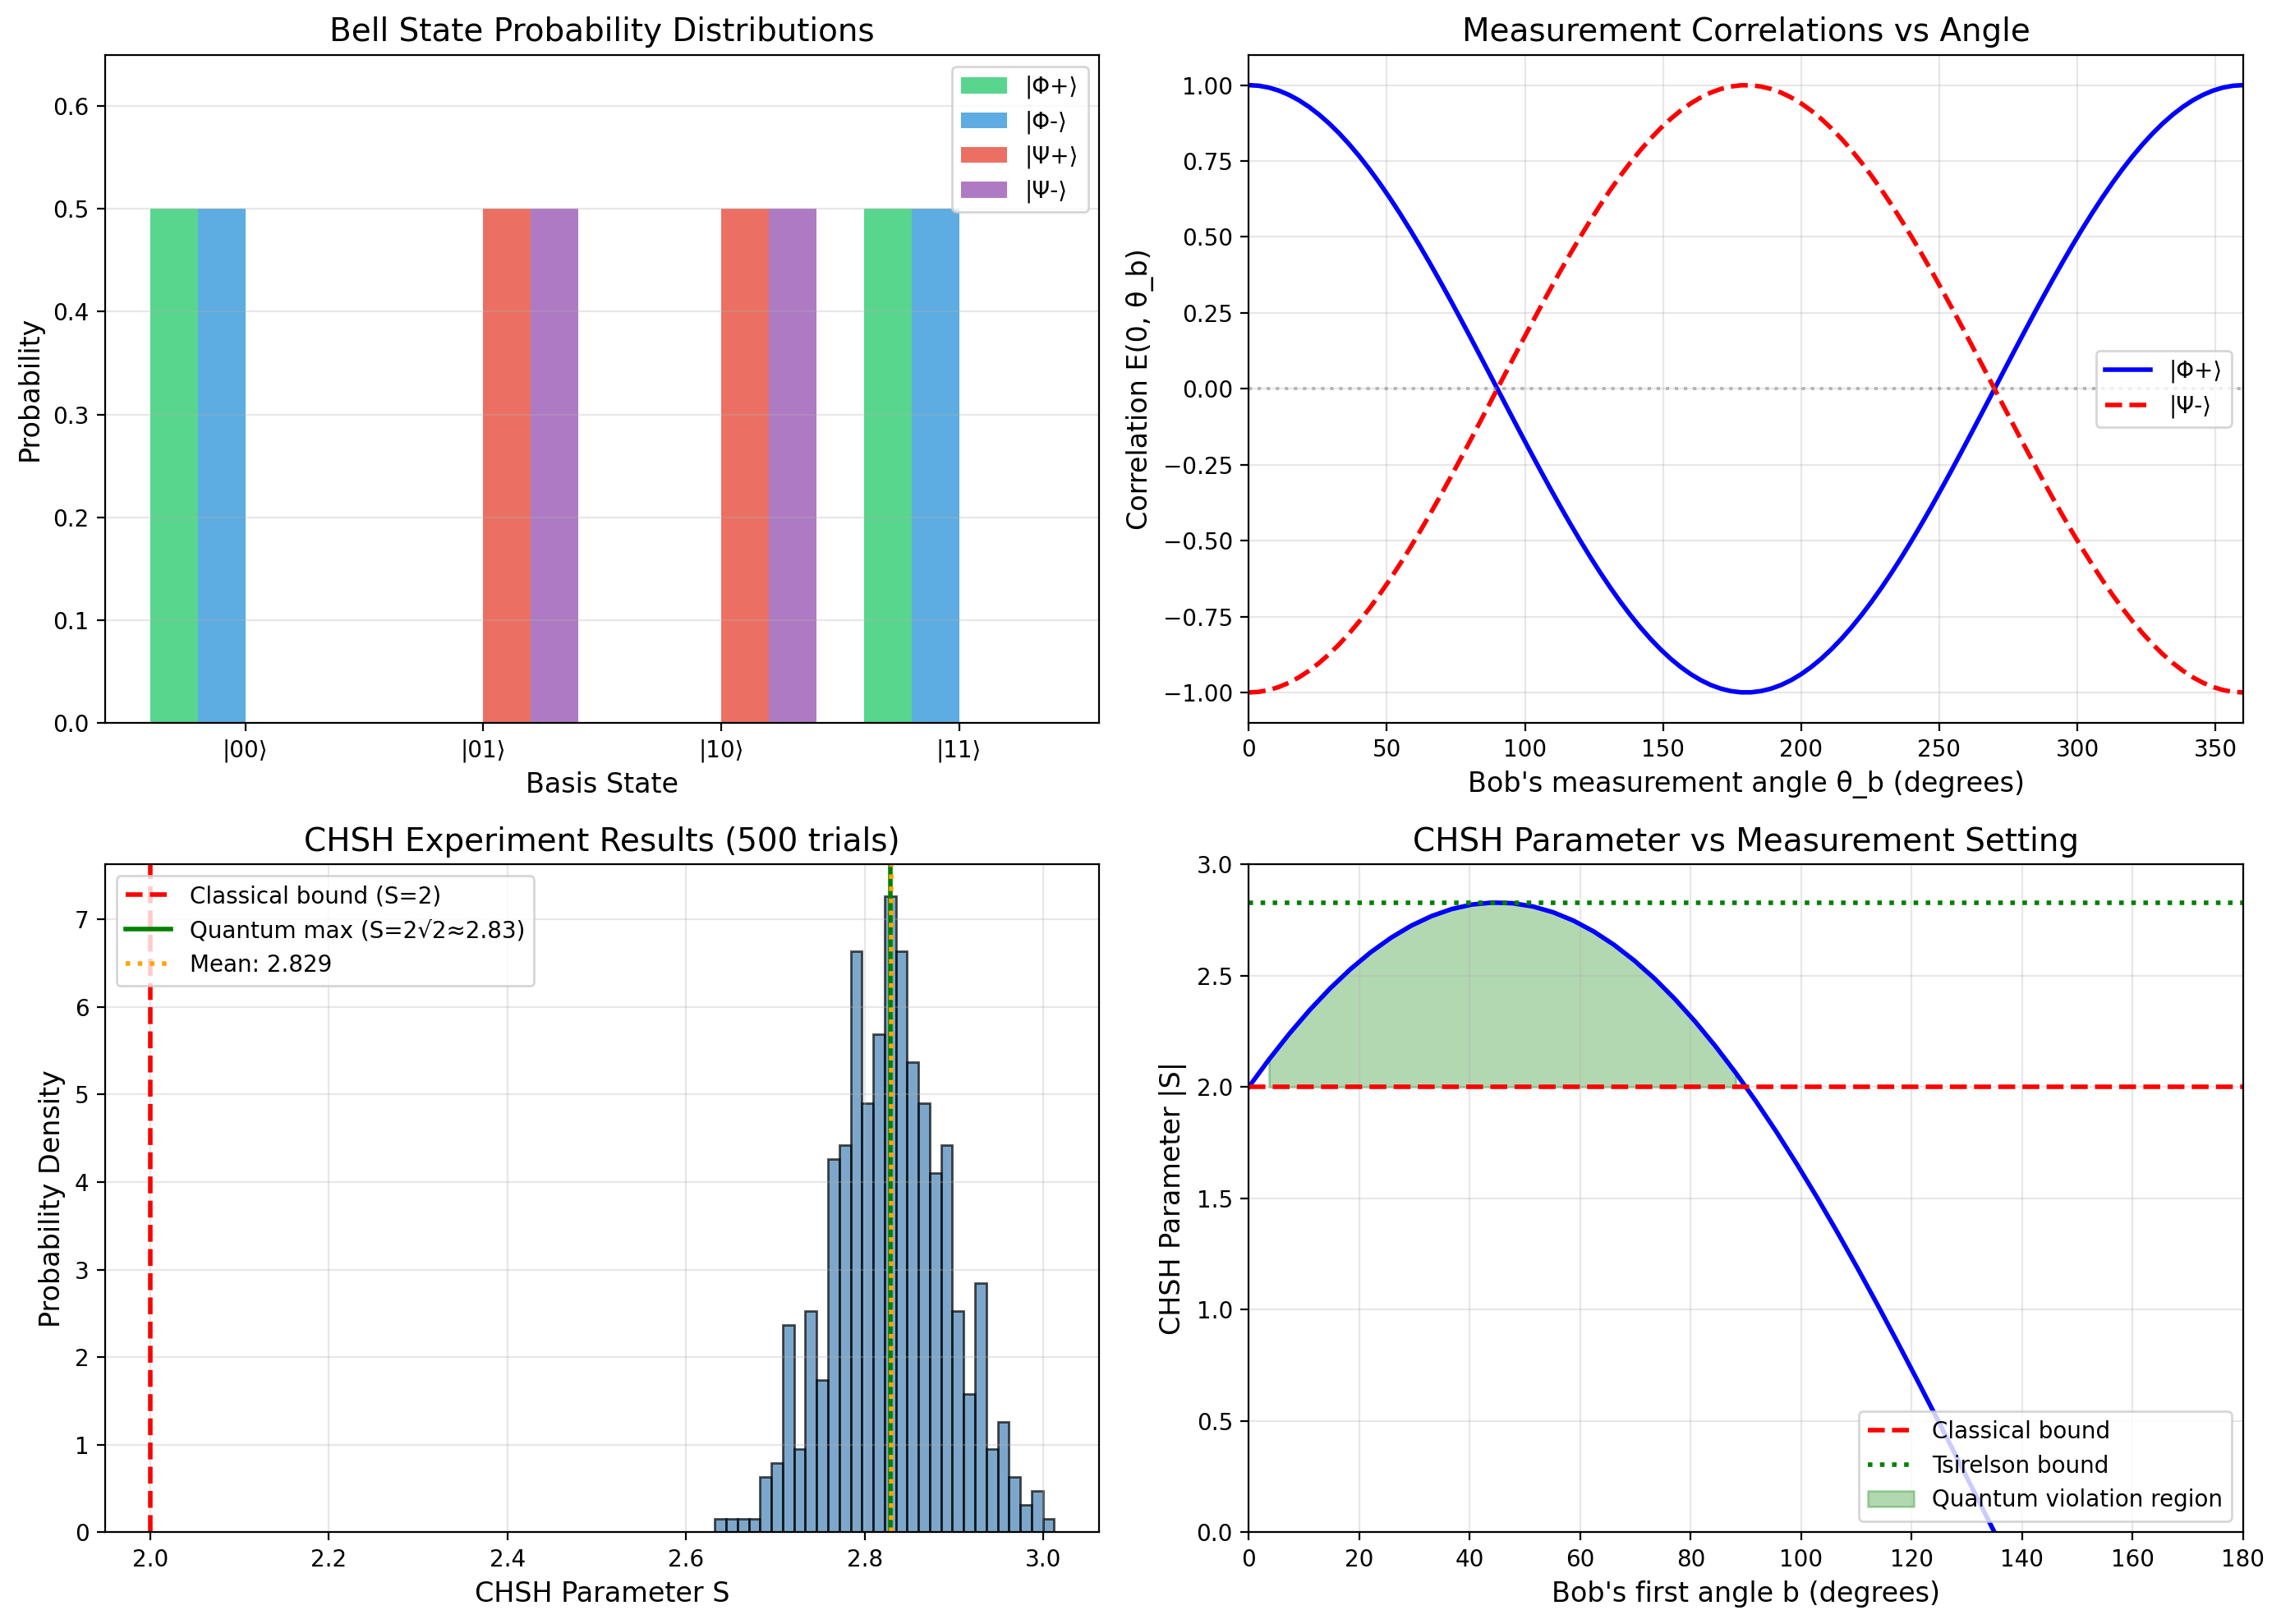


Plot saved to 'plot.png'


In [7]:
# Create comprehensive visualization
fig = plt.figure(figsize=(14, 10))

# 1. Bell State Probability Distributions
ax1 = fig.add_subplot(2, 2, 1)
x = np.arange(4)
width = 0.2
colors = ['#2ecc71', '#3498db', '#e74c3c', '#9b59b6']

for i, (name, state) in enumerate(bell_states.items()):
    probs = np.abs(state.flatten())**2
    ax1.bar(x + i*width, probs, width, label=f'|{name}⟩', color=colors[i], alpha=0.8)

ax1.set_xlabel('Basis State', fontsize=12)
ax1.set_ylabel('Probability', fontsize=12)
ax1.set_title('Bell State Probability Distributions', fontsize=14)
ax1.set_xticks(x + 1.5*width)
ax1.set_xticklabels(['|00⟩', '|01⟩', '|10⟩', '|11⟩'])
ax1.legend()
ax1.set_ylim(0, 0.65)
ax1.grid(axis='y', alpha=0.3)

# 2. Measurement Correlations
ax2 = fig.add_subplot(2, 2, 2)

# Calculate correlation as function of angle difference
theta_b_range = np.linspace(0, 2*np.pi, 100)
theta_a = 0  # Fix Alice's measurement at 0

correlations_phi_plus = [correlation_E(bell_states['Φ+'], theta_a, tb) for tb in theta_b_range]
correlations_psi_minus = [correlation_E(bell_states['Ψ-'], theta_a, tb) for tb in theta_b_range]

ax2.plot(np.degrees(theta_b_range), correlations_phi_plus, 'b-', linewidth=2, label='|Φ+⟩')
ax2.plot(np.degrees(theta_b_range), correlations_psi_minus, 'r--', linewidth=2, label='|Ψ-⟩')
ax2.axhline(y=0, color='gray', linestyle=':', alpha=0.5)

ax2.set_xlabel("Bob's measurement angle θ_b (degrees)", fontsize=12)
ax2.set_ylabel('Correlation E(0, θ_b)', fontsize=12)
ax2.set_title('Measurement Correlations vs Angle', fontsize=14)
ax2.legend()
ax2.grid(alpha=0.3)
ax2.set_xlim(0, 360)
ax2.set_ylim(-1.1, 1.1)

# 3. CHSH Parameter Histogram
ax3 = fig.add_subplot(2, 2, 3)

# More experiments for histogram
S_values_hist = []
for _ in range(500):
    S_exp, _ = simulate_chsh_experiment(phi_plus, 500)
    S_values_hist.append(S_exp)

ax3.hist(S_values_hist, bins=30, density=True, alpha=0.7, color='steelblue', edgecolor='black')
ax3.axvline(x=2, color='red', linestyle='--', linewidth=2, label='Classical bound (S=2)')
ax3.axvline(x=2*np.sqrt(2), color='green', linestyle='-', linewidth=2, label=f'Quantum max (S=2√2≈{2*np.sqrt(2):.2f})')
ax3.axvline(x=np.mean(S_values_hist), color='orange', linestyle=':', linewidth=2, 
            label=f'Mean: {np.mean(S_values_hist):.3f}')

ax3.set_xlabel('CHSH Parameter S', fontsize=12)
ax3.set_ylabel('Probability Density', fontsize=12)
ax3.set_title('CHSH Experiment Results (500 trials)', fontsize=14)
ax3.legend(loc='upper left')
ax3.grid(alpha=0.3)

# 4. CHSH Parameter vs Measurement Angles
ax4 = fig.add_subplot(2, 2, 4)

# Vary Bob's angle b while keeping others optimal
b_range = np.linspace(0, np.pi, 50)
a = 0
a_prime = np.pi/2
b_prime_values = []
S_vs_b = []

for b_val in b_range:
    # Keep b' = b + π/2 for each b
    b_prime_val = b_val + np.pi/2
    S_val = chsh_parameter(phi_plus, a, a_prime, b_val, b_prime_val)
    S_vs_b.append(S_val)

ax4.plot(np.degrees(b_range), S_vs_b, 'b-', linewidth=2)
ax4.axhline(y=2, color='red', linestyle='--', linewidth=2, label='Classical bound')
ax4.axhline(y=2*np.sqrt(2), color='green', linestyle=':', linewidth=2, label='Tsirelson bound')
ax4.fill_between(np.degrees(b_range), 2, S_vs_b, 
                  where=np.array(S_vs_b) > 2, alpha=0.3, color='green',
                  label='Quantum violation region')

ax4.set_xlabel("Bob's first angle b (degrees)", fontsize=12)
ax4.set_ylabel('CHSH Parameter |S|', fontsize=12)
ax4.set_title('CHSH Parameter vs Measurement Setting', fontsize=14)
ax4.legend(loc='lower right')
ax4.grid(alpha=0.3)
ax4.set_xlim(0, 180)
ax4.set_ylim(0, 3)

plt.tight_layout()
plt.savefig('quantum_entanglement_bell_states_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nPlot saved to 'plot.png'")

## Summary

In this notebook, we explored **quantum entanglement** through the lens of **Bell states**:

### Key Results

1. **Bell States**: We constructed the four maximally entangled Bell states using Hadamard and CNOT gates:
   - $|\Phi^+\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$
   - $|\Phi^-\rangle = \frac{1}{\sqrt{2}}(|00\rangle - |11\rangle)$
   - $|\Psi^+\rangle = \frac{1}{\sqrt{2}}(|01\rangle + |10\rangle)$
   - $|\Psi^-\rangle = \frac{1}{\sqrt{2}}(|01\rangle - |10\rangle)$

2. **Measurement Correlations**: Bell states exhibit perfect correlations (or anti-correlations) when measured in the same basis, demonstrating the "spooky action at a distance."

3. **CHSH Inequality Violation**: We demonstrated that the Bell state $|\Phi^+\rangle$ achieves:
   - $S = 2\sqrt{2} \approx 2.828$
   - This exceeds the classical bound of $|S| \leq 2$, proving that quantum correlations cannot be explained by local hidden variable theories.

### Physical Significance

The violation of Bell's inequality is one of the most profound results in quantum mechanics, demonstrating that:
- Nature is fundamentally non-local at the quantum level
- Quantum correlations are stronger than any classical correlation
- Local realism (as proposed by Einstein, Podolsky, and Rosen) is incompatible with quantum mechanics

These results have been experimentally verified countless times and form the foundation for quantum information technologies such as **quantum cryptography** (BB84, E91 protocols) and **quantum teleportation**.